# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import requests
import time

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
request = requests.get(url, headers = headers)

# If no information is extracted, then connect as anonymous
if request:
    time.sleep(10)
    soup = BeautifulSoup(request.text,"html")
    soup




In [24]:
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [34]:
#Look for Index tables
for index, table in enumerate(tables):
    index_table = index
    if index_table == 1:
        break
    
index


1

In [46]:
import pandas as pd
df_tesla_revenue = pd.DataFrame(columns= [
    "date", 
    "values"
])

for row in tables[index_table].tbody.find_all("tr"):
    col= row.find_all("td")
    if (col != []):
        date = col[0].text
        Revenue = col[1].text.replace("$","").replace(",",".").strip()
        df_tesla_revenue = pd.concat([df_tesla_revenue,pd.DataFrame({"date":date, "values": Revenue}, index=[0])], ignore_index= True)

In [47]:
df_tesla_revenue

,date,values
0,2024-09-30,25.182
1,2024-06-30,25.500
2,2024-03-31,21.301
3,2023-12-31,25.167
4,2023-09-30,23.350
...,...,...
57,2010-06-30,28
58,2010-03-31,21
59,2009-12-31,
60,2009-09-30,46


In [39]:
import sqlite3

connection = sqlite3.connect("TeslaQRevenue.db")
connection

In [41]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE TeslaQuarterlyRevenue (Date, Revenue)""")

In [49]:
tesla_data = list(df_tesla_revenue.to_records(index = False))
tesla_data[:5]

[np.record(('2024-09-30', '25.182'), dtype=[('date', 'O'), ('values', 'O')]),
 np.record(('2024-06-30', '25.500'), dtype=[('date', 'O'), ('values', 'O')]),
 np.record(('2024-03-31', '21.301'), dtype=[('date', 'O'), ('values', 'O')]),
 np.record(('2023-12-31', '25.167'), dtype=[('date', 'O'), ('values', 'O')]),
 np.record(('2023-09-30', '23.350'), dtype=[('date', 'O'), ('values', 'O')])]

In [51]:
cursor.executemany("INSERT INTO TeslaQuarterlyRevenue VALUES (?,?)", tesla_data)
connection.commit()

In [52]:
for row in cursor.execute("SELECT * FROM TeslaQuarterlyRevenue"):
    print(row)

('2024-09-30', '25.182')
('2024-06-30', '25.500')
('2024-03-31', '21.301')
('2023-12-31', '25.167')
('2023-09-30', '23.350')
('2023-06-30', '24.927')
('2023-03-31', '23.329')
('2022-12-31', '24.318')
('2022-09-30', '21.454')
('2022-06-30', '16.934')
('2022-03-31', '18.756')
('2021-12-31', '17.719')
('2021-09-30', '13.757')
('2021-06-30', '11.958')
('2021-03-31', '10.389')
('2020-12-31', '10.744')
('2020-09-30', '8.771')
('2020-06-30', '6.036')
('2020-03-31', '5.985')
('2019-12-31', '7.384')
('2019-09-30', '6.303')
('2019-06-30', '6.350')
('2019-03-31', '4.541')
('2018-12-31', '7.226')
('2018-09-30', '6.824')
('2018-06-30', '4.002')
('2018-03-31', '3.409')
('2017-12-31', '3.288')
('2017-09-30', '2.985')
('2017-06-30', '2.790')
('2017-03-31', '2.696')
('2016-12-31', '2.285')
('2016-09-30', '2.298')
('2016-06-30', '1.270')
('2016-03-31', '1.147')
('2015-12-31', '1.214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-

Revenue Trend Over Time

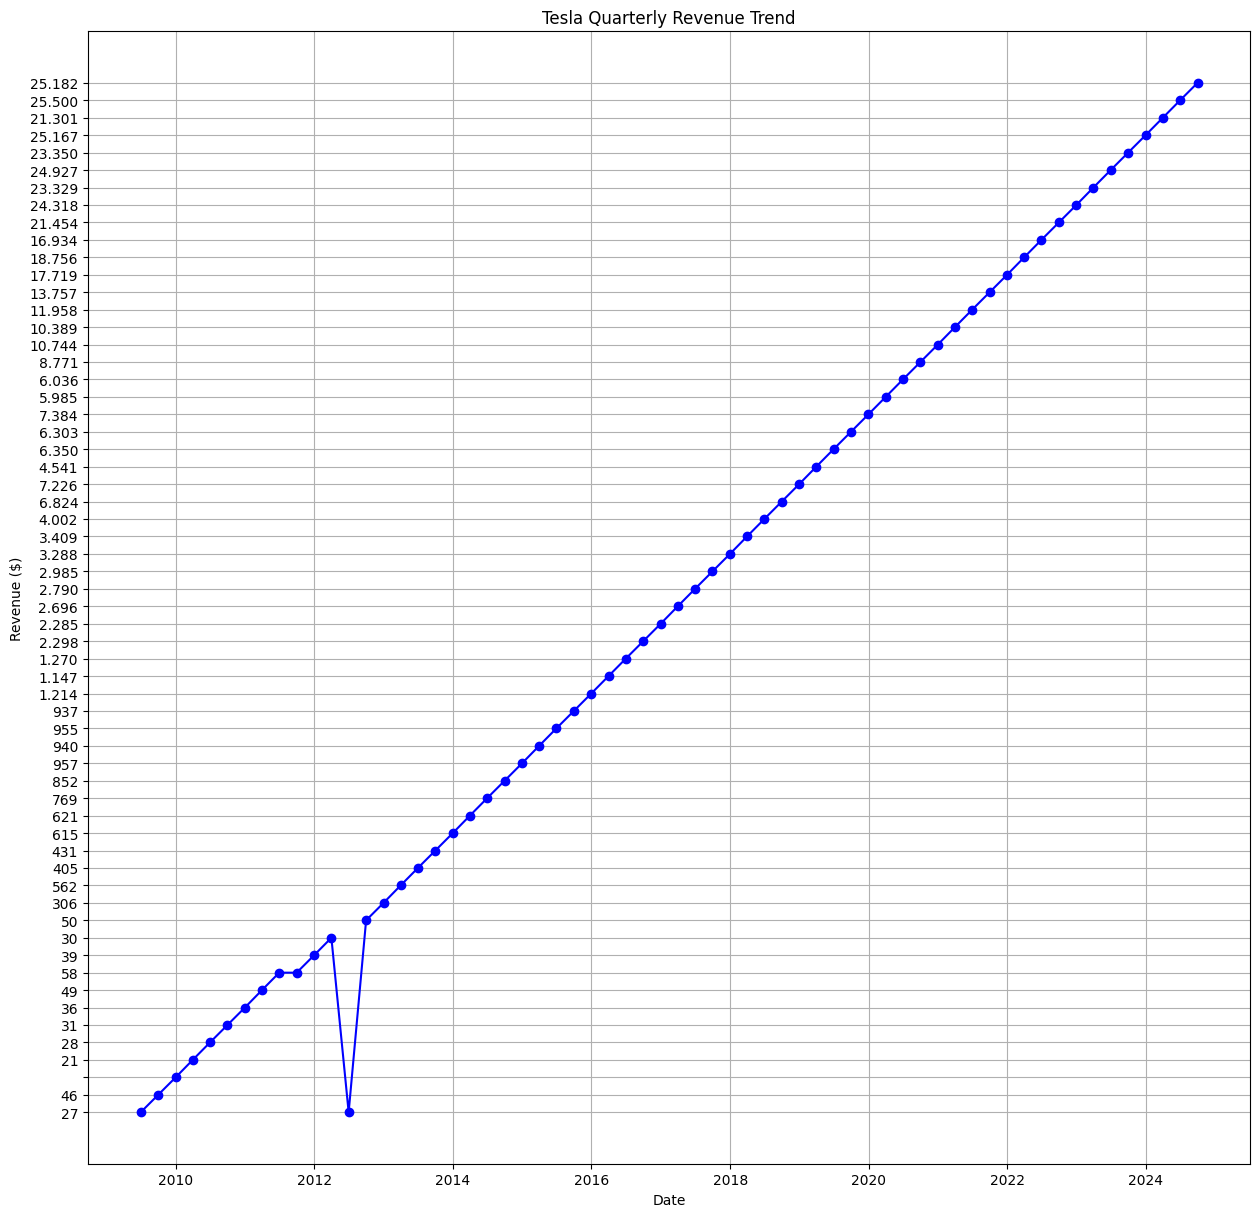

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df_tesla_revenue['date'] = pd.to_datetime(df_tesla_revenue['date'])
df_tesla_revenue.sort_values('date', inplace=True)

plt.figure(figsize=(15, 50))


plt.subplot(3, 1, 1)  
plt.plot(df_tesla_revenue['date'], df_tesla_revenue['values'], marker='o', linestyle='-', color='b')
plt.title('Tesla Quarterly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)

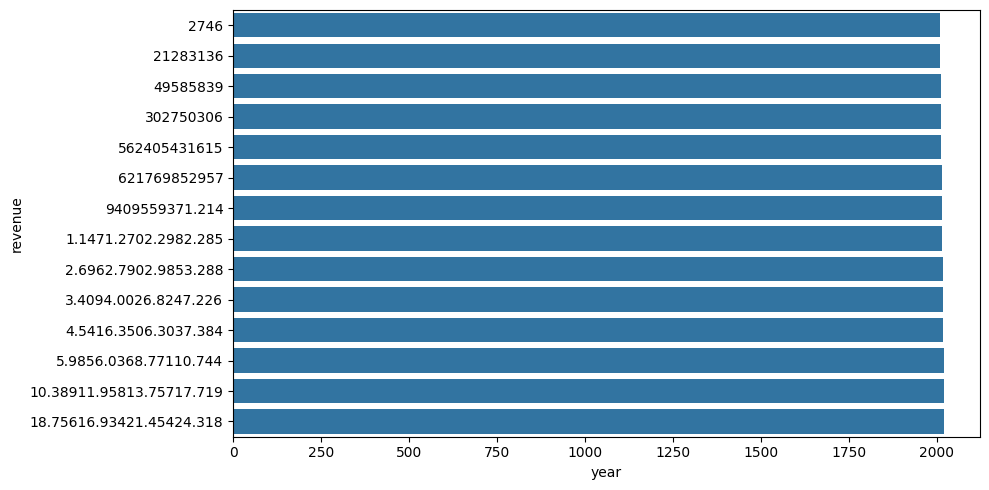

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tesla_revenue["date"] = pd.to_datetime(df_tesla_revenue["date"])

# Group by year and sum the "values" column (numerical data)
tesla_revenue_yearly = (
    df_tesla_revenue.groupby(df_tesla_revenue["date"].dt.year)["values"]
    .sum()
    .reset_index()
)

# Rename the columns for clarity
tesla_revenue_yearly.rename(columns={"date": "year", "values": "revenue"}, inplace=True)

# Filter out data for years less than 2023
filtered_data = tesla_revenue_yearly[tesla_revenue_yearly["year"] < 2023]

# Plot the data
fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data=filtered_data, x="year", y="revenue", ax=axis)

# Improve layout and display
plt.tight_layout()
plt.show()